<a href="https://colab.research.google.com/github/tuba89/Cifar10_ConvolutionNN/blob/main/cifar10_88_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !nvidia-smi

In [ ]:
# Import the CIFAR-10 dataset from keras' datasets
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
# Import this PyPlot to visualize images
import matplotlib.pyplot as plt
# this is packages of ploting 
# just to set some standard plot format
import matplotlib as mpl
# mpl.style.use('seaborn-colorblind')
# import matplotlib.patches as mpatches # this is for legends
# import matplotlib.font_manager # this is for fonts 
# for error (module 'matplotlib' has no attribute 'style') so i'll use "%matplotlib inline "
%matplotlib inline 
import numpy as np

from sklearn.utils import shuffle

# packages for the cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [ ]:
tf.keras.optimizers.Adamax

keras.optimizer_v2.adamax.Adamax

In [ ]:
# Download the dataset(it returns 2 tuples of training and testing data)   
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# create a liste of the classes name (labels name)
classes_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# number of classes
NUM_CLASSES = 10

In [ ]:
# check max value of training
x_train.max()

255

In [ ]:
print("train images shape =", x_train.shape)
print("train images dimension =", x_train.ndim)

train images shape = (50000, 32, 32, 3)
train images dimension = 4


* We have **50000** samples of images in **training** set, with height / width**= 32 x 32** pixels, and **3** channels (rgb) ==> colored images

In [ ]:
print("test images shape =", x_test.shape)
print("test images dimension =", x_test.ndim)

test images shape = (10000, 32, 32, 3)
test images dimension = 4


* We have **10000** samples of images in **testing** set, with same dimensions and channel as the training set

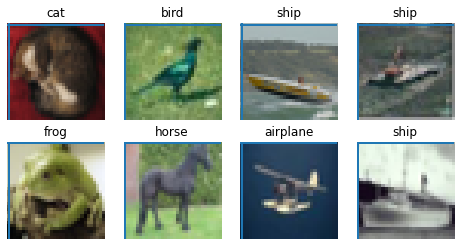

In [ ]:
# show random images from training set
# number of columns and rows
cols = 4 
rows = 2 

fig = plt.figure(figsize=(2 * cols, 2 * rows))

# for loop to add a subplot for each random image
for column in range(cols):
    for row in range(rows):
        # Pick a random number from between 0 and 50000 (label of images)
        random_index = np.random.randint(0, 50000) 
        # Add a subplot at (row, column)
        ax = fig.add_subplot(rows, cols, column * rows + row + 1) 
        ax.grid() 
        ax.axis("off") 
        ax.axhline(linewidth=2)        
        ax.axvline(linewidth=2)
        # now to show the random image:
        ax.imshow(x_train[random_index, :]) 
        ax.set_title(classes_name[y_train[random_index][0]]) 
# plt.setp(ax.spines.values(), linewidth=8)
plt.show()

### Data Preparation before Modeling

In [ ]:
print("TensorFlow's version is", tf.__version__)
print("Keras' version is", tf.keras.__version__)

TensorFlow's version is 2.7.0
Keras' version is 2.7.0


In [ ]:
# Normalize the data (values of training & testing images ) for faster training
# i'm  using range between 0 and 0.5
norm_train_pixls = x_train / 255 - 0.5
norm_test_pixls = x_test / 255 - 0.5

print(norm_train_pixls[2][0])

[[0.5        0.5        0.5       ]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.48823529 0.49215686]
 [0.49607843 0.49215686 0.49607843]
 [0.46078431 0.44901961 0.45686275]
 [0.38627451 0.37843137 0.37843137]
 [0.45686275 0.44901961 0.44509804]
 [0.44509804 0.4254902  0.41372549]
 [0.48039216 0.46470588 0.45294118]
 [0.49215686 0.48823529 0.48039216]
 [0.48823529 0.49215686 0.48823529]
 [0.48039216 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49215686]
 [0.49215686 0.49215686 0.49

In [ ]:
# transform labels (the classes) to one hot encoding
# one-hot encode the labels - we have 10 output classes
# so label 3 -> [0 0 0 1 0 0 0 0 0 0], 
# label 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
encoded_label_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
encoded_label_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

## Create the Model

In [ ]:
# model that takes images as input, and outputs class probabilities.
def make_model():
 
    model = Sequential()
    
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D())
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    
    model.add(Dense(units=256))
    model.add(LeakyReLU(0.1))
    
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(units=10))
    model.add(Activation("softmax"))
    
    return model

In [ ]:
# clear default graph
s = tf.keras.backend.clear_session() 

In [ ]:
# see the description the summary of model

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

### Train the model

In [ ]:
# initial learning rate
INIT_LR = 0.005  
# 64 training batch size , 50000//64 = 782 training in each epochs
BATCH_SIZE = 64
# train our model for 10 epochs
EPOCHS = 10

In [ ]:
s = tf.keras.backend.clear_session()  # clear default graph

In [ ]:
# prepare model for fitting (loss, optimizer and metrics)
# loss categorical because of multiclassification
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate= INIT_LR),
              metrics=['accuracy'])

In [ ]:
# create function of : learning rate scheduler, which decreases the learning rate after each epoch.
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

In [ ]:
tf.keras.backend.get_value

<function keras.backend.get_value>

In [ ]:
model.optimizer.lr

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>

In [ ]:
# create a class for callbacks, which shows the learning rate used in each epoch
# to control lr
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", tf.keras.backend.get_value(model.optimizer.lr))

In [ ]:
# now, train our model on normalized images and encoded labels
# fit model
history = model.fit(norm_train_pixls, encoded_label_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler),LrHistory()],
                    validation_data=(norm_test_pixls, encoded_label_test),
                    shuffle=True,
                    verbose=1,
                    initial_epoch=0)

Learning rate: 0.005
Epoch 1/10
782/782 [==============================] - 24s 16ms/step - loss: 1.3636 - accuracy: 0.5074 - val_loss: 0.9991 - val_accuracy: 0.6476 - lr: 0.0050
Learning rate: 0.0045
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9574 - accuracy: 0.6644 - val_loss: 0.8430 - val_accuracy: 0.7036 - lr: 0.0045
Learning rate: 0.00405
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.8219 - accuracy: 0.7125 - val_loss: 0.7326 - val_accuracy: 0.7420 - lr: 0.0041
Learning rate: 0.003645
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.7335 - accuracy: 0.7413 - val_loss: 0.7308 - val_accuracy: 0.7440 - lr: 0.0036
Learning rate: 0.0032805
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6733 - accuracy: 0.7628 - val_loss: 0.6812 - val_accuracy: 0.7662 - lr: 0.0033
Learning rate: 0.00295245
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss

In [ ]:
score = model.evaluate(norm_test_pixls, encoded_label_test, verbose=0)
a = score[0]
b = score[1]*100


print(f'loss = {a:.2f}')
print(f'accuracy = {b:.2f} %')

loss = 0.60
accuracy = 80.00 %


# Plot loss curve and accuracy curve

In [ ]:
print(history.history)

{'loss': [1.363633155822754, 0.957413375377655, 0.8219324946403503, 0.7335382103919983, 0.6732767820358276, 0.6234692931175232, 0.5798982977867126, 0.5476000905036926, 0.5125680565834045, 0.4841550290584564], 'accuracy': [0.5073599815368652, 0.6643800139427185, 0.7125200033187866, 0.7412999868392944, 0.7628200054168701, 0.7799400091171265, 0.7943800091743469, 0.8052399754524231, 0.8173199892044067, 0.8269799947738647], 'val_loss': [0.999132513999939, 0.8430343866348267, 0.7326276898384094, 0.7307842969894409, 0.6811964511871338, 0.6633803844451904, 0.6522768139839172, 0.6361635327339172, 0.6222746968269348, 0.6016590595245361], 'val_accuracy': [0.647599995136261, 0.7035999894142151, 0.7419999837875366, 0.7440000176429749, 0.7662000060081482, 0.767799973487854, 0.7771000266075134, 0.784500002861023, 0.791100025177002, 0.800000011920929], 'lr': [0.005, 0.0045, 0.00405, 0.003645, 0.0032805, 0.00295245, 0.002657205, 0.0023914846, 0.002152336, 0.0019371024]}


In [ ]:
mpl.style.use('grayscale') 

Text(0.5, 1.0, '--- The Loss Curve --- ')

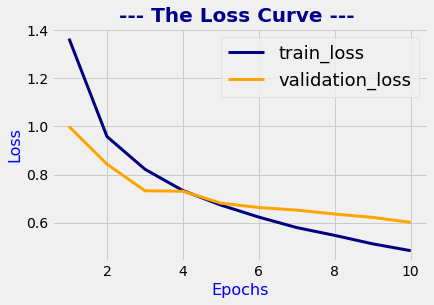

In [ ]:
plt.figure(figsize=[6, 4])
epoch_range = range(1, 11)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epoch_range, loss, 'navy', linewidth=3.0)
plt.plot(epoch_range, val_loss, 'orange', ls="-", linewidth=3.0)
plt.legend(['train_loss', 'validation_loss'], fontsize=18)
plt.xlabel("Epochs", fontsize=16, color="blue")
plt.ylabel("Loss", fontsize=16, color="blue")
plt.title("--- The Loss Curve --- ", fontsize=20, color="darkblue", fontweight="bold")

# if using google colab
# and wants to upload or download files
# from google.colab import files
# plt.savefig('loss.png', bbox_inches="tight", dpi = 300)
# files.download('loss.png')

Text(0.5, 1.0, '-- The accuracy Curve -- ')

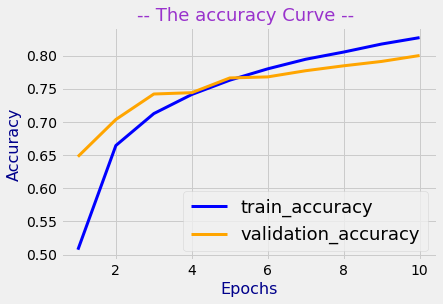

In [ ]:
plt.figure(figsize=[6, 4])
# how many class we have
epoch_range = range(1, 11) # 10 classe

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epoch_range, acc, 'b', linewidth=3.0)
plt.plot(epoch_range, val_acc, 'orange', ls="-", linewidth=3.0)
# valid location in legend  are :  best, upper right, upper left, lower left
# lower right, right, center left, center right, lower center, upper center, center
plt.legend(['train_accuracy', 'validation_accuracy'], fontsize=18, loc="lower right")

plt.xlabel("Epochs", fontsize=16, c="darkblue")
plt.ylabel("Accuracy", fontsize=16, c="darkblue")
plt.title("-- The accuracy Curve -- ", fontsize=18, c="darkorchid")

# plt.savefig('accuracy.png', bbox_inches="tight", dpi = 300)
# files.download('accuracy.png')

## Make predictions

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = np.argmax(model.predict(norm_test_pixls), axis=-1)

In [ ]:
print("the first 2 classes predicted : ", y_pred[:3])
print("the first 2 true classes  : \n", y_test[:3])

the first 2 classes predicted :  [3 8 8]
the first 2 true classes  : 
 [[3]
 [8]
 [8]]


In [ ]:
encoded_label_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Confusion matrix

In [ ]:
# confusion matrix
label = tf.argmax(encoded_label_test, axis = 1)
matr = confusion_matrix(label, y_pred)

In [ ]:
matr

array([[832,   7,  53,  14,  22,   1,   8,   5,  36,  22],
       [ 10, 904,   3,   6,   1,   1,   8,   1,  21,  45],
       [ 51,   4, 677,  31,  88,  42,  61,  33,   8,   5],
       [ 20,   3,  63, 578,  71, 160,  59,  29,   9,   8],
       [ 10,   3,  43,  28, 822,  11,  37,  38,   7,   1],
       [  9,   0,  34, 117,  52, 715,  23,  38,  10,   2],
       [  5,   0,  36,  30,  32,  12, 880,   1,   3,   1],
       [ 11,   2,  27,  20,  52,  40,   6, 837,   2,   3],
       [ 42,  19,  12,   8,   7,   2,   3,   7, 887,  13],
       [ 24,  50,   5,   9,   5,   5,   5,  12,  17, 868]])

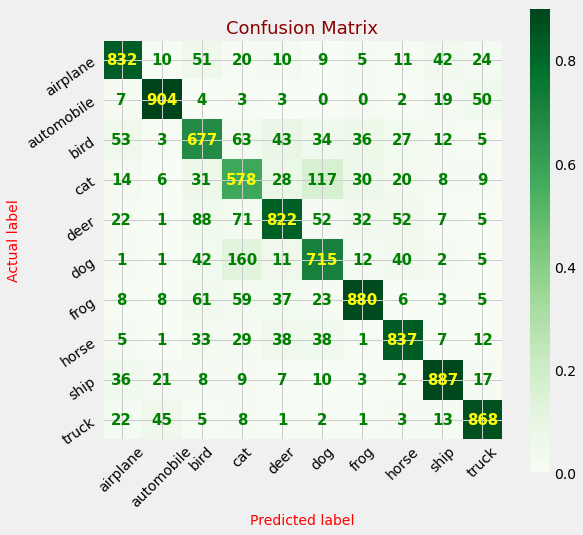

In [ ]:
mpl.style.use('fivethirtyeight')
accuracies = matr/matr.sum(1)
fig, ax = plt.subplots(figsize=(8,8))
cb = ax.imshow(accuracies, cmap='Greens')
plt.xticks(range(len(classes_name)), classes_name, rotation=45, fontsize=14)
plt.yticks(range(len(classes_name)), classes_name, rotation=35, fontsize=14)

for i in range(len(classes_name)):
    for j in range(len(classes_name)):
        color='green' if accuracies[i,j] < 0.5 else 'yellow'
        ax.annotate(f'{matr[i,j]}', (i,j), 
                    color=color, fontsize=15, fontweight="bold", va='center', ha='center')

plt.colorbar(cb, ax=ax)
ax.set_title('Confusion Matrix', fontsize=18, c="darkred")
plt.ylabel('Actual label',  fontsize=14, c="red")
plt.xlabel('Predicted label', fontsize=14, c="red");
plt.show()

## Second Model

In [ ]:
model_b = Sequential()

# change filters number from 16 yo 32 in first conv layer
# and change the activation funsctions to relu
# add batchnormalization layers and drop out for better result , 
# batch norm ; normalize the values w.t.r to the batch of inputs and speedss up the training
model_b.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))

model_b.add(BatchNormalization())
model_b.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPooling2D(pool_size=(2,2)))
model_b.add(Dropout(0.3))

model_b.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPooling2D(pool_size=(2,2)))
model_b.add(Dropout(0.5))

model_b.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPooling2D(pool_size=(2,2)))
model_b.add(Dropout(0.5))

model_b.add(Flatten())
model_b.add(Dense(128, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.5))
model_b.add(Dense(10, activation='softmax'))  


In [ ]:
# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [ ]:
# change the optimizer to adam, remove learning rate initialized
# remove callbacks and shuffling th data
# in general; make a sample compiling, and fit whit simple Arguments
# adama opt, categorical_crossentropy for multiclass classification and accuracy metric
model_b.compile(optimizer= 'adam', loss= "categorical_crossentropy", metrics= ['accuracy'])

In [ ]:
# fiting 64 100, each epoch contains 782 training batches
history_b = model_b.fit(norm_train_pixls, encoded_label_train, 
                        batch_size=64, epochs=100,
                        validation_data=(norm_test_pixls, encoded_label_test))

Epoch 1/100
782/782 [==============================] - 21s 25ms/step - loss: 1.7528 - accuracy: 0.3930 - val_loss: 1.4110 - val_accuracy: 0.4904
Epoch 2/100
782/782 [==============================] - 19s 24ms/step - loss: 1.2345 - accuracy: 0.5570 - val_loss: 0.9995 - val_accuracy: 0.6397
Epoch 3/100
782/782 [==============================] - 19s 24ms/step - loss: 1.0188 - accuracy: 0.6393 - val_loss: 0.8603 - val_accuracy: 0.6945
Epoch 4/100
782/782 [==============================] - 19s 24ms/step - loss: 0.9049 - accuracy: 0.6846 - val_loss: 0.7501 - val_accuracy: 0.7348
Epoch 5/100
782/782 [==============================] - 19s 24ms/step - loss: 0.8214 - accuracy: 0.7142 - val_loss: 0.7414 - val_accuracy: 0.7387
Epoch 6/100
782/782 [==============================] - 19s 24ms/step - loss: 0.7692 - accuracy: 0.7346 - val_loss: 0.6452 - val_accuracy: 0.7764
Epoch 7/100
782/782 [==============================] - 19s 24ms/step - loss: 0.7202 - accuracy: 0.7511 - val_loss: 0.6368 - val_ac

# Evaluation

In [ ]:
score_b = model_b.evaluate(norm_test_pixls, encoded_label_test, verbose=0)
a = score_b[0]
b = score_b[1]*100


print(f'loss = {a:.2f}')
print(f'accuracy = {b:.2f} %')

loss = 0.39
accuracy = 88.42 %


# Plot accuracy vs Loss of the sencond model

Text(0.5, 1.0, '-- The accuracy Curve -- ')

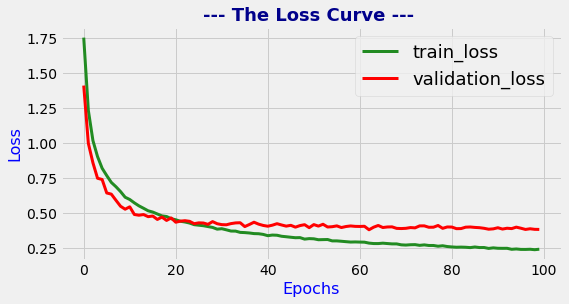

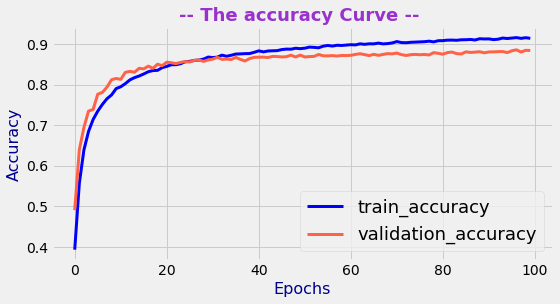

In [ ]:
plt.figure(figsize=[8, 4])
epoch_range = range(0, 100)
loss = history_b.history['loss']
val_loss = history_b.history['val_loss']
plt.plot(epoch_range, loss, 'forestgreen', linewidth=3.0)
plt.plot(epoch_range, val_loss, 'red', ls="-", linewidth=3.0)
plt.legend(['train_loss', 'validation_loss'], fontsize=18)
plt.xlabel("Epochs", fontsize=16, color="blue")
plt.ylabel("Loss", fontsize=16, color="blue")
plt.title("--- The Loss Curve --- ", fontsize=18, color="darkblue", fontweight="bold")

plt.figure(figsize=[8, 4])
# how many class we have
epoch_range = range(0, 100) # 10 classe

acc = history_b.history['accuracy']
val_acc = history_b.history['val_accuracy']

plt.plot(epoch_range, acc, 'b', linewidth=3.0)
plt.plot(epoch_range, val_acc, 'tomato', ls="-", linewidth=3.0)
# valid location in legend  are :  best, upper right, upper left, lower left
# lower right, right, center left, center right, lower center, upper center, center
plt.legend(['train_accuracy', 'validation_accuracy'], fontsize=18, loc="lower right")

plt.xlabel("Epochs", fontsize=16, c="darkblue")
plt.ylabel("Accuracy", fontsize=16, c="darkblue")
plt.title("-- The accuracy Curve -- ", fontsize=18, c="darkorchid", fontweight="bold")

In [ ]:
y_pred_b = np.argmax(model_b.predict(norm_test_pixls), axis=-1)
print("the first 2 classes predicted : ", y_pred_b[:3])
print("the first 2 true classes  : \n", y_test[:3])

the first 2 classes predicted :  [3 8 8]
the first 2 true classes  : 
 [[3]
 [8]
 [8]]


# Confusion matrix for the second model

In [ ]:
# confusion matrix
label_b = tf.argmax(encoded_label_test, axis = 1)
matr_b = confusion_matrix(label_b, y_pred_b)

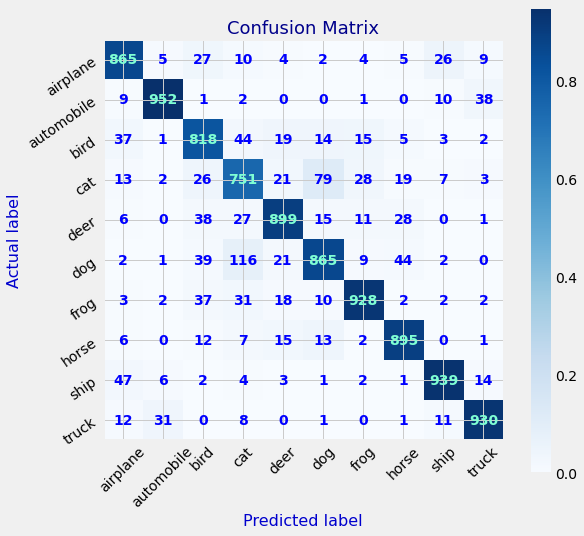

In [ ]:
mpl.style.use('fivethirtyeight')
accuracies = matr_b/matr_b.sum(1)
fig, ax = plt.subplots(figsize=(8,8))
cb = ax.imshow(accuracies, cmap='Blues')
plt.xticks(range(len(classes_name)), classes_name, rotation=45, fontsize=14)
plt.yticks(range(len(classes_name)), classes_name, rotation=35, fontsize=14)

for i in range(len(classes_name)):
    for j in range(len(classes_name)):
        color='blue' if accuracies[i,j] < 0.5 else 'aquamarine'
        ax.annotate(f'{matr_b[i,j]}', (i,j), 
                    color=color, fontsize=14, fontweight="bold", va='center', ha='center')

plt.colorbar(cb, ax=ax)
ax.set_title('Confusion Matrix', fontsize=18, c="darkblue")
plt.ylabel('Actual label',  fontsize=16, c="mediumblue")
plt.xlabel('Predicted label', fontsize=16, c="mediumblue")
plt.show();

In [ ]:
test_images = norm_test_pixls
test_labels = encoded_label_test
#or
# test_labels2 = label

# Plot some random predictions 

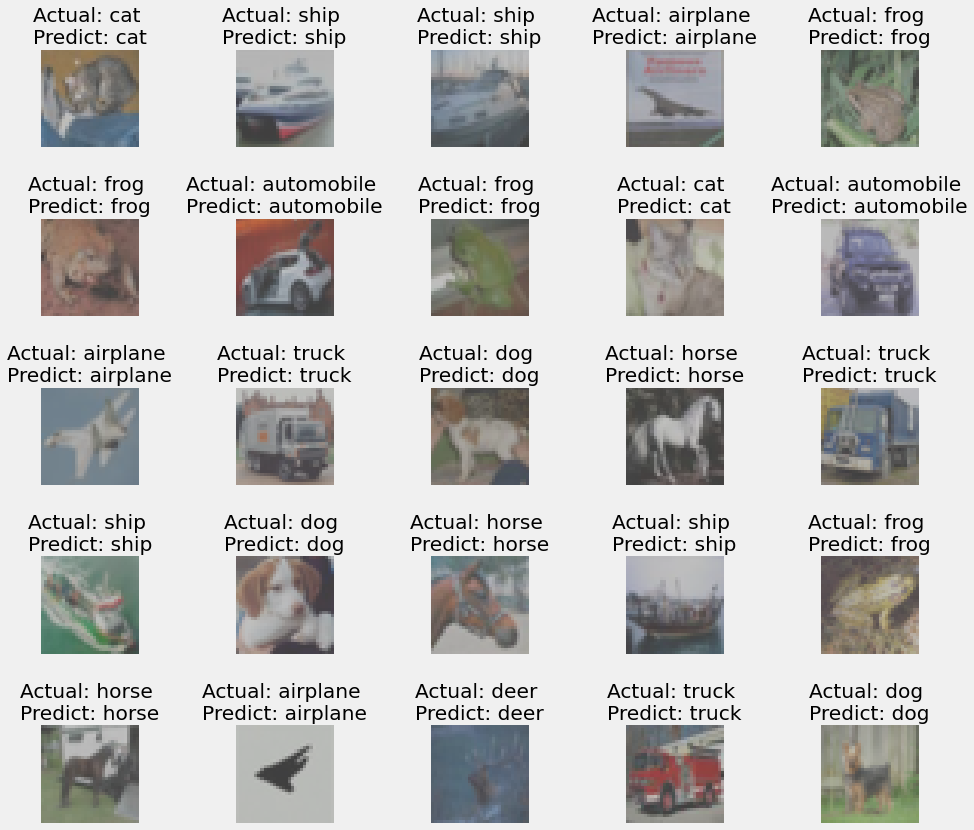

In [ ]:
# Plotting the Actual and Predicted results

fig, axes = plt.subplots(5, 5, figsize=(14,14))
axes = axes.ravel()

for i in np.arange(0, 25):
    img = test_images[i] / 2 + 0.5 # rescaling each image because color intensity is a float
    axes[i].imshow(img)
    axes[i].set_title("Actual: %s \nPredict: %s" % (classes_name[np.argmax(test_labels[i])], classes_name[y_pred_b[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1);

# Saving the models

### HDF5 format

Keras provides a basic save format using the [HDF5] standard. 

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('cifar10_first_79.h5') 
model_b.save('cifar10_second_88.h5') 

#### Now, recreate the model from that file:

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('cifar10_first_79.h5')
new_model_b = tf.keras.models.load_model('cifar10_second_88.h5')

In [ ]:
# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [ ]:
# Show the model architecture
new_model_b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('First model, Accuracy= {:5.2f}%'.format(100 * acc))

313/313 - 2s - loss: 0.6017 - accuracy: 0.8000 - 2s/epoch - 5ms/step
First model, Accuracy= 80.00%


In [ ]:
loss_b, acc_b = new_model_b.evaluate(test_images, test_labels, verbose=2)
print('The model_b, Accuracy= {:5.2f}%'.format(100 * acc_b))

313/313 - 2s - loss: 0.3853 - accuracy: 0.8842 - 2s/epoch - 7ms/step
The model_b, Accuracy= 88.42%
